# COMP47590: Advanced Machine Learning
# Assignment 1: Multi-label Classification

Names: Susmitha Tadavarthi, Shaurya Gogia

Student Numbers: 19200996, 19200891

## Import Packages Etc

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import copy
import matplotlib.pyplot as plt  
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.utils.validation import check_X_y, check_array, check_is_fitted
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import hamming_loss
from sklearn.metrics import make_scorer
from sklearn import metrics
from sklearn import tree
from sklearn import ensemble
from sklearn import linear_model
from collections import Counter
from imblearn.under_sampling import ClusterCentroids
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [0]:
import warnings
warnings.filterwarnings("ignore")

## Task 0: Load the Yeast Dataset

In [3]:
dataset = pd.read_csv('https://raw.githubusercontent.com/Susmitha1694/AdvancedMachineLearning/master/yeast.csv')
dataset

,Att1,Att2,Att3,Att4,Att5,Att6,Att7,Att8,Att9,Att10,Att11,Att12,Att13,Att14,Att15,Att16,Att17,Att18,Att19,Att20,Att21,Att22,Att23,Att24,Att25,Att26,Att27,Att28,Att29,Att30,Att31,Att32,Att33,Att34,Att35,Att36,Att37,Att38,Att39,Att40,...,Att78,Att79,Att80,Att81,Att82,Att83,Att84,Att85,Att86,Att87,Att88,Att89,Att90,Att91,Att92,Att93,Att94,Att95,Att96,Att97,Att98,Att99,Att100,Att101,Att102,Att103,Class1,Class2,Class3,Class4,Class5,Class6,Class7,Class8,Class9,Class10,Class11,Class12,Class13,Class14
0,0.004168,-0.170975,-0.156748,-0.142151,0.058781,0.026851,0.197719,0.041850,0.066938,-0.056617,-0.027230,-0.137411,0.067776,0.047175,0.155671,0.050766,0.102557,-0.020259,-0.200512,-0.095371,-0.081940,-0.103735,0.093299,0.105475,0.148560,0.085925,0.107879,0.108075,0.085388,0.124026,-0.003650,-0.127376,0.039394,-0.018364,0.050378,0.157190,0.203563,0.111552,0.017907,-0.001126,...,-0.175325,-0.133636,0.005524,-0.014981,-0.031946,-0.015114,-0.047175,0.003829,0.010967,-0.006062,-0.027560,-0.019866,-0.024046,-0.025153,-0.009261,-0.025539,0.006166,-0.012976,-0.014259,-0.015024,-0.010747,0.000411,-0.032056,-0.018312,0.030126,0.124722,0,0,0,0,0,0,1,1,0,0,0,1,1,0
1,-0.103956,0.011879,-0.098986,-0.054501,-0.007970,0.049113,-0.030580,-0.077933,-0.080529,-0.016267,-0.215304,-0.009885,-0.155843,-0.059522,-0.098836,-0.071141,-0.023494,-0.071200,0.027767,0.003091,-0.003761,0.074600,0.053080,-0.008138,0.001794,-0.111704,-0.140291,-0.063347,0.066767,-0.167073,-0.095567,-0.047209,0.082206,0.144445,0.086581,-0.111850,-0.086560,0.024942,-0.131539,0.080062,...,-0.001249,-0.020209,-0.077359,-0.045139,-0.074738,0.051846,0.009323,0.184332,0.420424,-0.090224,-0.090718,-0.035266,-0.046729,0.000575,-0.066023,-0.051916,0.007680,0.027719,-0.085811,0.111123,0.050541,0.027565,-0.063569,-0.041471,-0.079758,0.017161,0,0,1,1,0,0,0,0,0,0,0,0,0,0
2,0.509949,0.401709,0.293799,0.087714,0.011686,-0.006411,-0.006255,0.013646,-0.040666,-0.024447,-0.040576,0.014326,-0.074968,0.141365,-0.015182,0.013691,0.006893,0.003736,-0.020726,-0.044104,-0.052959,-0.085572,-0.061547,-0.029578,0.027700,-0.094310,-0.047721,-0.081589,-0.022846,-0.106684,-0.068873,-0.105225,-0.065414,-0.047722,-0.070723,-0.057425,-0.042024,-0.034122,-0.049606,0.015137,...,-0.002432,0.001711,-0.083572,-0.096943,0.148457,-0.007413,0.130691,-0.032325,0.028612,-0.023051,-0.092214,-0.103336,0.138232,-0.100351,0.140423,0.110074,0.096277,-0.044932,-0.089470,-0.009162,-0.012010,0.308378,-0.028053,0.026710,-0.066565,-0.122352,0,1,1,0,0,0,0,0,0,0,0,1,1,0
3,0.119092,0.004412,-0.002262,0.072254,0.044512,-0.051467,0.074686,-0.007670,0.079438,0.062184,-0.013027,0.045538,0.080412,-0.010042,0.013029,-0.071975,0.089818,-0.016129,0.033105,0.024275,0.040428,0.064248,0.225613,0.176576,0.015501,0.009491,-0.013684,-0.017633,0.085007,-0.056274,-0.088925,-0.062951,0.227151,0.165897,0.150224,0.065105,0.110891,0.048451,0.114726,0.020393,...,-0.111806,-0.154732,0.302807,0.340027,-0.093332,-0.057848,-0.010558,-0.039194,-0.041628,-0.077455,-0.008553,-0.022404,-0.106131,-0.103067,-0.083059,-0.089064,-0.083809,0.200354,-0.075716,0.196605,0.152758,-0.028484,-0.074207,-0.089227,-0.049913,-0.043893,0,0,1,1,0,0,0,0,0,0,0,0,0,0
4,0.042037,0.007054,-0.069483,0.081015,-0.048207,0.089446,-0.004947,0.064456,-0.133387,0.068878,-0.139371,0.041487,-0.058531,0.021264,-0.101382,0.021015,0.096572,-0.005136,0.111104,-0.008323,0.020210,-0.003967,0.039762,0.006744,-0.041730,-0.174533,-0.101343,-0.115674,0.328511,-0.108945,-0.160748,-0.120290,-0.148308,-0.082882,-0.127218,-0.167186,-0.143210,-0.118028,-0.297516,-0.160082,...,0.108388,0.095516,0.015942,0.087354,0.176911,-0.062311,0.117205,-0.048277,-0.053679,0.014850,-0.066453,-0.067962,-0.083653,-0.081130,-0.061469,0.023662,-0.060467,0.044351,-0.057209,0.028047,0.029661,-0.050026,0.023248,-0.061539,-0.035160,0.067834,0,0,1,1,1,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...

## Task 1: Implement the Binary Relevance Algorithm

In [0]:
class BinaryRelevanceAlg(BaseEstimator, ClassifierMixin):
    
    # Constructor for the classifier object
    def __init__(self, PredictClassifier=GaussianNB()):
        self.PredictClassifier = PredictClassifier

    # The fit function to train a classifier
    def fit(self, X, y):
    
        models = []
        
        #For each label in the data set training a model of the given classifier on all the features 
        #and storing all individual models in a list.
        for instance in y.columns:
            X, y[instance] = check_X_y(X, y[instance])
            model = copy.copy(self.PredictClassifier)
            model.fit(X,y[instance])
            models.append(model)
        
        self.models_ = models
        
        # Return the classifier
        return self

    # The predict function to make a set of predictions for a set of query instances
    def predict(self, X):

        # Check that the input features match the type and shape of the training features
        X = check_array(X)
        
        # Initialise an empty list to store the predictions made
        predictions = list()
        
        #loop thorugh all models in the list to make the predictions for each label
        for model in self.models_:
            predict = model.predict(X)
            predictions.append(predict)
        return np.array(predictions).T
    
    
    # The predict function to make a set of predictions for a set of query instances
    def predict_proba(self, X):

        # Check that the input features match the type and shape of the training features
        X = check_array(X)
        
         # Initialise an empty list to store the predictions made
        predict_proba_list = list()
        
        #loop thorugh all models in the list to make the predictions and probabilites for each label
        for model in self.models_:
            predict_pro = model.predict_proba(X)
            predict_proba_list.append(predict_pro)
            
        return np.array(predict_proba_list).T

In [0]:
#Splitting the data set in to features and labels
x = dataset.iloc[:,:-14]
y = dataset.iloc[:,-14:]

In [0]:
#Dividing the features and labels into training set and test set
X_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

In [0]:
#Lists to store the hamming loss values for each algorithm
binaryRelevanceList = []
binaryRelevanceWithUndersamplingList = []
chainClassificationList = []

## Evaluation of Binary Relevance

### Classifier 1 : Naive Bayes

In [8]:
my_model_NB = BinaryRelevanceAlg(GaussianNB())
my_model_NB.fit(X_train, y_train)

BinaryRelevanceAlg(PredictClassifier=GaussianNB(priors=None,
                                                var_smoothing=1e-09))

In [9]:
# Make a set of predictions for the training data
y_pred = my_model_NB.predict(x_test)

ham_loss = hamming_loss(y_test, y_pred)
print("hamming_loss: " +  str(ham_loss))

print("\n\n")
print(metrics.classification_report(y_test, y_pred))

hamming_loss: 0.29412632821723733



              precision    recall  f1-score   support

           0       0.56      0.65      0.60       143
           1       0.52      0.67      0.59       206
           2       0.65      0.76      0.70       201
           3       0.65      0.58      0.61       180
           4       0.57      0.51      0.54       152
           5       0.41      0.53      0.46       124
           6       0.29      0.49      0.37        90
           7       0.31      0.54      0.39       102
           8       0.08      0.23      0.12        40
           9       0.22      0.48      0.30        56
          10       0.24      0.39      0.30        70
          11       0.82      0.65      0.73       369
          12       0.82      0.65      0.72       364
          13       0.04      0.22      0.07         9

   micro avg       0.52      0.60      0.56      2106
   macro avg       0.44      0.52      0.46      2106
weighted avg       0.60      0.60      0.59

In [0]:
binaryRelevanceList.append(round(ham_loss,3))

In [11]:
y_pred_prob = my_model_NB.predict_proba(x_test)
y_pred_prob

array([[[9.96639774e-01, 9.66466695e-01, 5.59303472e-01, ...,
         9.34292456e-03, 7.36342450e-03, 9.99845643e-01],
        [1.07392885e-01, 2.02884152e-04, 2.23900907e-02, ...,
         9.51656415e-01, 9.37571401e-01, 9.99960328e-01],
        [9.87501495e-01, 8.00867502e-01, 1.47116645e-01, ...,
         7.04888243e-03, 8.99262034e-03, 9.99994629e-01],
        ...,
        [2.12813779e-07, 5.40235847e-03, 9.99924442e-01, ...,
         9.99448474e-01, 9.99220187e-01, 1.00000000e+00],
        [1.12346569e-01, 5.98445103e-02, 6.92549532e-01, ...,
         2.08065998e-01, 2.44976099e-01, 9.99999011e-01],
        [9.92305132e-01, 2.83575749e-03, 3.84515585e-05, ...,
         6.37845352e-01, 5.29838130e-01, 6.84220876e-04]],

       [[3.36022634e-03, 3.35333046e-02, 4.40696528e-01, ...,
         9.90657075e-01, 9.92636575e-01, 1.54356765e-04],
        [8.92607115e-01, 9.99797116e-01, 9.77609909e-01, ...,
         4.83435849e-02, 6.24285991e-02, 3.96722835e-05],
        [1.24985049e-02, 

### Classifier 2 : Decision Tree

In [12]:
my_model_DT = BinaryRelevanceAlg(tree.DecisionTreeClassifier(criterion="entropy"))
my_model_DT.fit(X_train, y_train)

BinaryRelevanceAlg(PredictClassifier=DecisionTreeClassifier(ccp_alpha=0.0,
                                                            class_weight=None,
                                                            criterion='entropy',
                                                            max_depth=None,
                                                            max_features=None,
                                                            max_leaf_nodes=None,
                                                            min_impurity_decrease=0.0,
                                                            min_impurity_split=None,
                                                            min_samples_leaf=1,
                                                            min_samples_split=2,
                                                            min_weight_fraction_leaf=0.0,
                                                            presort='deprecated',
                        

In [13]:
# Make a set of predictions for the training data
y_pred = my_model_DT.predict(x_test)

ham_loss = hamming_loss(y_test, y_pred)
print("hamming_loss: " +  str(ham_loss))

print("\n\n")
print(metrics.classification_report(y_test, y_pred))

hamming_loss: 0.27361275088547815



              precision    recall  f1-score   support

           0       0.52      0.51      0.51       143
           1       0.52      0.53      0.52       206
           2       0.62      0.61      0.61       201
           3       0.63      0.58      0.60       180
           4       0.50      0.49      0.50       152
           5       0.32      0.34      0.33       124
           6       0.33      0.38      0.35        90
           7       0.31      0.39      0.35       102
           8       0.12      0.07      0.09        40
           9       0.17      0.14      0.15        56
          10       0.25      0.20      0.22        70
          11       0.77      0.75      0.76       369
          12       0.75      0.71      0.73       364
          13       0.00      0.00      0.00         9

   micro avg       0.56      0.55      0.56      2106
   macro avg       0.41      0.41      0.41      2106
weighted avg       0.56      0.55      0.56

In [0]:
binaryRelevanceList.append(round(ham_loss,3))

In [15]:
y_pred_prob = my_model_DT.predict_proba(x_test)
y_pred_prob

array([[[1., 1., 0., ..., 1., 0., 1.],
        [1., 0., 0., ..., 0., 0., 1.],
        [1., 1., 1., ..., 0., 0., 1.],
        ...,
        [1., 1., 1., ..., 0., 1., 1.],
        [1., 1., 1., ..., 0., 0., 1.],
        [1., 1., 0., ..., 1., 0., 1.]],

       [[0., 0., 1., ..., 0., 1., 0.],
        [0., 1., 1., ..., 1., 1., 0.],
        [0., 0., 0., ..., 1., 1., 0.],
        ...,
        [0., 0., 0., ..., 1., 0., 0.],
        [0., 0., 0., ..., 1., 1., 0.],
        [0., 0., 1., ..., 0., 1., 0.]]])

### Classifier 3 : Random Forest

In [16]:
my_model_RF = BinaryRelevanceAlg(ensemble.RandomForestClassifier(n_estimators=300, max_features = 3, min_samples_split=200))
my_model_RF.fit(X_train, y_train)

BinaryRelevanceAlg(PredictClassifier=RandomForestClassifier(bootstrap=True,
                                                            ccp_alpha=0.0,
                                                            class_weight=None,
                                                            criterion='gini',
                                                            max_depth=None,
                                                            max_features=3,
                                                            max_leaf_nodes=None,
                                                            max_samples=None,
                                                            min_impurity_decrease=0.0,
                                                            min_impurity_split=None,
                                                            min_samples_leaf=1,
                                                            min_samples_split=200,
                                              

In [17]:
# Make a set of predictions for the training data
y_pred = my_model_RF.predict(x_test)

ham_loss = hamming_loss(y_test, y_pred)
print("hamming_loss: " +  str(ham_loss))

print("\n\n")
print(metrics.classification_report(y_test, y_pred))

hamming_loss: 0.21384297520661158



              precision    recall  f1-score   support

           0       0.88      0.16      0.27       143
           1       0.65      0.28      0.39       206
           2       0.76      0.34      0.47       201
           3       0.94      0.25      0.39       180
           4       0.96      0.16      0.27       152
           5       0.00      0.00      0.00       124
           6       0.00      0.00      0.00        90
           7       0.00      0.00      0.00       102
           8       0.00      0.00      0.00        40
           9       0.00      0.00      0.00        56
          10       0.00      0.00      0.00        70
          11       0.76      1.00      0.87       369
          12       0.75      1.00      0.86       364
          13       0.00      0.00      0.00         9

   micro avg       0.76      0.45      0.57      2106
   macro avg       0.41      0.23      0.25      2106
weighted avg       0.61      0.45      0.45

In [0]:
binaryRelevanceList.append(round(ham_loss,3))

In [19]:
y_pred_prob = my_model_RF.predict_proba(x_test)
y_pred_prob

array([[[0.71201677, 0.61397731, 0.57326547, ..., 0.19742182,
         0.21054889, 0.97982952],
        [0.72440081, 0.49218882, 0.50877234, ..., 0.28283774,
         0.26591634, 0.98885663],
        [0.69451312, 0.53681155, 0.58080623, ..., 0.21215868,
         0.21764025, 0.98884878],
        ...,
        [0.56064918, 0.50842828, 0.66919038, ..., 0.32100905,
         0.32616277, 0.9935432 ],
        [0.66089332, 0.54904818, 0.59566025, ..., 0.26470743,
         0.29054009, 0.98366352],
        [0.73726745, 0.52883667, 0.44884541, ..., 0.27595624,
         0.28598776, 0.99058563]],

       [[0.28798323, 0.38602269, 0.42673453, ..., 0.80257818,
         0.78945111, 0.02017048],
        [0.27559919, 0.50781118, 0.49122766, ..., 0.71716226,
         0.73408366, 0.01114337],
        [0.30548688, 0.46318845, 0.41919377, ..., 0.78784132,
         0.78235975, 0.01115122],
        ...,
        [0.43935082, 0.49157172, 0.33080962, ..., 0.67899095,
         0.67383723, 0.0064568 ],
        [0.3

### Classifier 4 : Logistic Regression

In [20]:
my_model_LR = BinaryRelevanceAlg(linear_model.LogisticRegression())
my_model_LR.fit(X_train, y_train)

BinaryRelevanceAlg(PredictClassifier=LogisticRegression(C=1.0,
                                                        class_weight=None,
                                                        dual=False,
                                                        fit_intercept=True,
                                                        intercept_scaling=1,
                                                        l1_ratio=None,
                                                        max_iter=100,
                                                        multi_class='auto',
                                                        n_jobs=None,
                                                        penalty='l2',
                                                        random_state=None,
                                                        solver='lbfgs',
                                                        tol=0.0001, verbose=0,
                                                        war

In [21]:
# Make a set of predictions for the training data
y_pred = my_model_LR.predict(x_test)

ham_loss = hamming_loss(y_test, y_pred)
print("hamming_loss: " +  str(ham_loss))

print("\n\n")
print(metrics.classification_report(y_test, y_pred))

hamming_loss: 0.20306965761511217



              precision    recall  f1-score   support

           0       0.68      0.48      0.56       143
           1       0.55      0.49      0.51       206
           2       0.70      0.63      0.66       201
           3       0.71      0.54      0.61       180
           4       0.80      0.38      0.51       152
           5       0.70      0.17      0.27       124
           6       1.00      0.03      0.06        90
           7       0.67      0.02      0.04       102
           8       0.00      0.00      0.00        40
           9       0.00      0.00      0.00        56
          10       0.00      0.00      0.00        70
          11       0.76      0.98      0.86       369
          12       0.75      0.98      0.85       364
          13       0.00      0.00      0.00         9

   micro avg       0.72      0.57      0.63      2106
   macro avg       0.52      0.34      0.35      2106
weighted avg       0.66      0.57      0.56

In [0]:
binaryRelevanceList.append(round(ham_loss,3))

In [23]:
y_pred_prob = my_model_DT.predict_proba(x_test)
y_pred_prob

array([[[1., 1., 0., ..., 1., 0., 1.],
        [1., 0., 0., ..., 0., 0., 1.],
        [1., 1., 1., ..., 0., 0., 1.],
        ...,
        [1., 1., 1., ..., 0., 1., 1.],
        [1., 1., 1., ..., 0., 0., 1.],
        [1., 1., 0., ..., 1., 0., 1.]],

       [[0., 0., 1., ..., 0., 1., 0.],
        [0., 1., 1., ..., 1., 1., 0.],
        [0., 0., 0., ..., 1., 1., 0.],
        ...,
        [0., 0., 0., ..., 1., 0., 0.],
        [0., 0., 0., ..., 1., 1., 0.],
        [0., 0., 1., ..., 0., 1., 0.]]])

## Task 2: Implement the Binary Relevance Algorithm with Under-Sampling

In [0]:
class BinaryRelevanceAlgWithUnderSampling(BaseEstimator, ClassifierMixin):
    
    # Constructor for the classifier object
    def __init__(self, PredictClassifier=GaussianNB(),underSampling=False):
        self.PredictClassifier = PredictClassifier
        self.underSampling = underSampling

    # The fit function to train a classifier
    def fit(self, X, y):
        
        models = []
          
        #For each label in the data set training a model of the given classifier on all the features 
        #and storing all individual models in a list.
        for instance in y.columns:
            X, y[instance] = check_X_y(X, y[instance])
            x_resampled = X
            y_resampled = y[instance]
            #performing undersampling
            if self.underSampling == True:
                cc = RandomUnderSampler(random_state=0)
                x_resampled, y_resampled = cc.fit_resample(x_resampled, y_resampled)
            model = copy.copy(self.PredictClassifier)
            model.fit(x_resampled,y_resampled)
            models.append(model)

        self.models_ = models
        
        # Return the classifier
        return self

    # The predict function to make a set of predictions for a set of query instances
    def predict(self, X):

        # Check that the input features match the type and shape of the training features
        X = check_array(X)
        
        # Initialise an empty list to store the predictions made
        predictions = list()
        
        #loop thorugh all models in the list to make the predictions for each label
        for model in self.models_:
            predict = model.predict(X)
            predictions.append(predict)
        return np.array(predictions).T
    
    
    # The predict function to make a set of predictions for a set of query instances
    def predict_proba(self, X):

        # Check that the input features match the type and shape of the training features
        X = check_array(X)
        
         # Initialise an empty list to store the predictions made
        predict_proba_list = list()
        
        #loop thorugh all models in the list to make the predictions and probabilities for each label
        for model in self.models_:
            predict_pro = model.predict_proba(X)
            predict_proba_list.append(predict_pro)
            
        return np.array(predict_proba_list).T

## Evaluation of Binary Relevance with Under Sampling

### Classifier 1 : Naive Bayes

In [25]:
my_model_US_NB = BinaryRelevanceAlgWithUnderSampling(GaussianNB(),True)
my_model_US_NB.fit(X_train, y_train)

BinaryRelevanceAlgWithUnderSampling(PredictClassifier=GaussianNB(priors=None,
                                                                 var_smoothing=1e-09),
                                    underSampling=True)

In [26]:
# Make a set of predictions for the training data
y_pred = my_model_US_NB.predict(x_test)

ham_loss = hamming_loss(y_test, y_pred)
print("hamming_loss: " +  str(ham_loss))

print("\n\n")
print(metrics.classification_report(y_test, y_pred))

hamming_loss: 0.3735242030696576



              precision    recall  f1-score   support

           0       0.52      0.66      0.58       143
           1       0.52      0.71      0.60       206
           2       0.63      0.77      0.69       201
           3       0.61      0.63      0.62       180
           4       0.53      0.55      0.54       152
           5       0.40      0.62      0.49       124
           6       0.24      0.56      0.33        90
           7       0.28      0.63      0.39       102
           8       0.10      0.60      0.17        40
           9       0.18      0.75      0.29        56
          10       0.20      0.64      0.31        70
          11       0.84      0.51      0.63       369
          12       0.82      0.52      0.64       364
          13       0.03      0.44      0.05         9

   micro avg       0.43      0.61      0.50      2106
   macro avg       0.42      0.61      0.45      2106
weighted avg       0.59      0.61      0.56 

In [0]:
binaryRelevanceWithUndersamplingList.append(round(ham_loss,3))

In [28]:
y_pred_prob = my_model_US_NB.predict_proba(x_test)
y_pred_prob

array([[[9.90171848e-01, 9.31739930e-01, 2.35125369e-01, ...,
         1.00658751e-02, 6.25679334e-02, 2.76191157e-02],
        [3.48565694e-02, 2.90904586e-04, 1.63998320e-03, ...,
         9.55729128e-01, 9.96179196e-01, 8.45721178e-01],
        [9.62720781e-01, 8.30659429e-01, 1.25442867e-01, ...,
         7.91203840e-02, 2.70025351e-02, 9.99198364e-01],
        ...,
        [8.78605183e-08, 7.85926771e-03, 9.99943422e-01, ...,
         9.98022135e-01, 9.99655631e-01, 7.35453494e-01],
        [1.96414784e-01, 6.28043346e-02, 6.65864584e-01, ...,
         4.29711275e-01, 9.84144622e-02, 1.16401622e-04],
        [8.60085374e-01, 1.38008558e-03, 1.21188088e-05, ...,
         9.93572547e-01, 6.31223911e-02, 6.84020572e-01]],

       [[9.82815186e-03, 6.82600703e-02, 7.64874631e-01, ...,
         9.89934125e-01, 9.37432067e-01, 9.72380884e-01],
        [9.65143431e-01, 9.99709095e-01, 9.98360017e-01, ...,
         4.42708721e-02, 3.82080421e-03, 1.54278822e-01],
        [3.72792187e-02, 

### Classifier 2 : Decision Trees

In [29]:
my_model_US_DT = BinaryRelevanceAlgWithUnderSampling(tree.DecisionTreeClassifier(criterion="entropy"),True)
my_model_US_DT.fit(X_train, y_train)

BinaryRelevanceAlgWithUnderSampling(PredictClassifier=DecisionTreeClassifier(ccp_alpha=0.0,
                                                                             class_weight=None,
                                                                             criterion='entropy',
                                                                             max_depth=None,
                                                                             max_features=None,
                                                                             max_leaf_nodes=None,
                                                                             min_impurity_decrease=0.0,
                                                                             min_impurity_split=None,
                                                                             min_samples_leaf=1,
                                                                             min_samples_split=2,
                          

In [30]:
# Make a set of predictions for the training data
y_pred = my_model_US_DT.predict(x_test)

ham_loss = hamming_loss(y_test, y_pred)
print("hamming_loss: " +  str(ham_loss))

print("\n\n")
print(metrics.classification_report(y_test, y_pred))

hamming_loss: 0.41278040141676503



              precision    recall  f1-score   support

           0       0.37      0.57      0.45       143
           1       0.52      0.63      0.57       206
           2       0.56      0.60      0.58       201
           3       0.50      0.64      0.57       180
           4       0.42      0.61      0.50       152
           5       0.33      0.54      0.41       124
           6       0.24      0.53      0.33        90
           7       0.26      0.59      0.36       102
           8       0.09      0.50      0.15        40
           9       0.16      0.66      0.26        56
          10       0.17      0.61      0.27        70
          11       0.77      0.56      0.65       369
          12       0.80      0.56      0.66       364
          13       0.02      0.33      0.04         9

   micro avg       0.39      0.58      0.47      2106
   macro avg       0.37      0.57      0.41      2106
weighted avg       0.53      0.58      0.53

In [0]:
binaryRelevanceWithUndersamplingList.append(round(ham_loss,3))

In [32]:
y_pred_prob = my_model_US_DT.predict_proba(x_test)
y_pred_prob

array([[[1., 0., 1., ..., 1., 1., 1.],
        [1., 1., 0., ..., 0., 1., 0.],
        [1., 0., 0., ..., 1., 0., 1.],
        ...,
        [1., 0., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 0., 0., 0.],
        [1., 0., 1., ..., 1., 1., 1.]],

       [[0., 1., 0., ..., 0., 0., 0.],
        [0., 0., 1., ..., 1., 0., 1.],
        [0., 1., 1., ..., 0., 1., 0.],
        ...,
        [0., 1., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 1., 1., 1.],
        [0., 1., 0., ..., 0., 0., 0.]]])

### Classifier 3 : Random Forest

In [33]:
my_model_US_RF = BinaryRelevanceAlgWithUnderSampling(ensemble.RandomForestClassifier(n_estimators=300, max_features = 3, min_samples_split=200),True)
my_model_US_RF.fit(X_train, y_train)

BinaryRelevanceAlgWithUnderSampling(PredictClassifier=RandomForestClassifier(bootstrap=True,
                                                                             ccp_alpha=0.0,
                                                                             class_weight=None,
                                                                             criterion='gini',
                                                                             max_depth=None,
                                                                             max_features=3,
                                                                             max_leaf_nodes=None,
                                                                             max_samples=None,
                                                                             min_impurity_decrease=0.0,
                                                                             min_impurity_split=None,
                                       

In [34]:
# Make a set of predictions for the training data
y_pred = my_model_US_RF.predict(x_test)

ham_loss = hamming_loss(y_test, y_pred)
print("hamming_loss: " +  str(ham_loss))

print("\n\n")
print(metrics.classification_report(y_test, y_pred))

hamming_loss: 0.43845926800472257



              precision    recall  f1-score   support

           0       0.49      0.66      0.56       143
           1       0.54      0.71      0.61       206
           2       0.65      0.77      0.70       201
           3       0.65      0.66      0.65       180
           4       0.55      0.59      0.57       152
           5       0.38      0.58      0.46       124
           6       0.27      0.60      0.37        90
           7       0.33      0.62      0.43       102
           8       0.08      1.00      0.15        40
           9       0.17      0.77      0.28        56
          10       0.23      0.71      0.34        70
          11       0.85      0.57      0.68       369
          12       0.82      0.56      0.67       364
          13       0.02      1.00      0.04         9

   micro avg       0.38      0.64      0.48      2106
   macro avg       0.43      0.70      0.47      2106
weighted avg       0.60      0.64      0.58

In [0]:
binaryRelevanceWithUndersamplingList.append(round(ham_loss,3))

In [36]:
y_pred_prob = my_model_US_RF.predict_proba(x_test)
y_pred_prob

array([[[0.56521496, 0.53412908, 0.50556253, ..., 0.45329994,
         0.4603608 , 0.4978    ],
        [0.52320077, 0.4103086 , 0.44185928, ..., 0.4975778 ,
         0.51455576, 0.4978    ],
        [0.5226242 , 0.50502037, 0.50838255, ..., 0.43101106,
         0.43678729, 0.4978    ],
        ...,
        [0.37723562, 0.45171641, 0.59443111, ..., 0.54682142,
         0.57588881, 0.4978    ],
        [0.52782638, 0.48998022, 0.50500209, ..., 0.49781747,
         0.49130303, 0.4978    ],
        [0.5771484 , 0.46729177, 0.36747013, ..., 0.58814761,
         0.53702826, 0.4978    ]],

       [[0.43478504, 0.46587092, 0.49443747, ..., 0.54670006,
         0.5396392 , 0.5022    ],
        [0.47679923, 0.5896914 , 0.55814072, ..., 0.5024222 ,
         0.48544424, 0.5022    ],
        [0.4773758 , 0.49497963, 0.49161745, ..., 0.56898894,
         0.56321271, 0.5022    ],
        ...,
        [0.62276438, 0.54828359, 0.40556889, ..., 0.45317858,
         0.42411119, 0.5022    ],
        [0.4

### Classifier 4 : Logistic Regression

In [37]:
my_model_US_LR = BinaryRelevanceAlgWithUnderSampling(linear_model.LogisticRegression(),True)
my_model_US_LR.fit(X_train, y_train)

BinaryRelevanceAlgWithUnderSampling(PredictClassifier=LogisticRegression(C=1.0,
                                                                         class_weight=None,
                                                                         dual=False,
                                                                         fit_intercept=True,
                                                                         intercept_scaling=1,
                                                                         l1_ratio=None,
                                                                         max_iter=100,
                                                                         multi_class='auto',
                                                                         n_jobs=None,
                                                                         penalty='l2',
                                                                         random_state=None,
                       

In [38]:
# Make a set of predictions for the training data
y_pred = my_model_US_LR.predict(x_test)

ham_loss = hamming_loss(y_test, y_pred)
print("hamming_loss: " +  str(ham_loss))

print("\n\n")
print(metrics.classification_report(y_test, y_pred))

hamming_loss: 0.36038961038961037



              precision    recall  f1-score   support

           0       0.53      0.66      0.59       143
           1       0.54      0.66      0.59       206
           2       0.66      0.77      0.71       201
           3       0.59      0.71      0.65       180
           4       0.50      0.62      0.55       152
           5       0.39      0.62      0.48       124
           6       0.26      0.62      0.37        90
           7       0.25      0.55      0.35       102
           8       0.11      0.57      0.19        40
           9       0.19      0.70      0.30        56
          10       0.20      0.60      0.30        70
          11       0.84      0.55      0.67       369
          12       0.83      0.56      0.67       364
          13       0.03      0.56      0.06         9

   micro avg       0.44      0.62      0.52      2106
   macro avg       0.42      0.63      0.46      2106
weighted avg       0.59      0.62      0.58

In [0]:
binaryRelevanceWithUndersamplingList.append(round(ham_loss,3))

In [40]:
y_pred_prob = my_model_US_LR.predict_proba(x_test)
y_pred_prob

array([[[0.68964122, 0.76797283, 0.61232977, ..., 0.4514248 ,
         0.4469043 , 0.49815549],
        [0.60223981, 0.48236878, 0.28689987, ..., 0.61600276,
         0.67164209, 0.48057672],
        [0.63637805, 0.35085557, 0.45870198, ..., 0.31203222,
         0.40115888, 0.6272534 ],
        ...,
        [0.18973715, 0.27232406, 0.66247796, ..., 0.5476897 ,
         0.63257763, 0.67372514],
        [0.74921949, 0.56659706, 0.37983968, ..., 0.53718317,
         0.45701152, 0.58643042],
        [0.60748455, 0.4142099 , 0.16524912, ..., 0.73048552,
         0.53708431, 0.53239373]],

       [[0.31035878, 0.23202717, 0.38767023, ..., 0.5485752 ,
         0.5530957 , 0.50184451],
        [0.39776019, 0.51763122, 0.71310013, ..., 0.38399724,
         0.32835791, 0.51942328],
        [0.36362195, 0.64914443, 0.54129802, ..., 0.68796778,
         0.59884112, 0.3727466 ],
        ...,
        [0.81026285, 0.72767594, 0.33752204, ..., 0.4523103 ,
         0.36742237, 0.32627486],
        [0.2

## Task 3: Compare the Performance of Different Binary Relevance Approaches

In [0]:
cv_folds=10

#### Binary Relevance Algorithm with Undersampling

In [42]:
my_model_BR_US = BinaryRelevanceAlgWithUnderSampling()
#Calculating Cross-Validation Scores
scores = cross_val_score(my_model_BR_US, X_train, y_train, cv=cv_folds, n_jobs=-1,scoring = make_scorer(hamming_loss))
print(scores)

[0.2757732  0.29381443 0.31369661 0.30014804 0.30792006 0.27942265
 0.31828275 0.32050333 0.28793486 0.31791266]


In [43]:
# Set up the parameter grid to seaerch
param_grid = {'PredictClassifier': [GaussianNB(), tree.DecisionTreeClassifier(criterion="entropy") ,\
                                   ensemble.RandomForestClassifier(n_estimators=300, max_features = 3, min_samples_split=200), \
                                   linear_model.LogisticRegression()],\
               'underSampling':[True,False]}

# Perform the search
my_tuned_tree_BR_US = GridSearchCV(BinaryRelevanceAlgWithUnderSampling(), \
                                param_grid, cv=2, verbose = 0, \
                            return_train_score=True,scoring = make_scorer(hamming_loss,greater_is_better=False))
my_tuned_tree_BR_US.fit(X_train, y_train)

# Print details
print("Best parameters set found on development set:")
display(my_tuned_tree_BR_US.best_params_)
display(my_tuned_tree_BR_US.best_score_)
# display(my_tuned_tree_BR_US.cv_results_)

Best parameters set found on development set:


{'PredictClassifier': LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                    intercept_scaling=1, l1_ratio=None, max_iter=100,
                    multi_class='auto', n_jobs=None, penalty='l2',
                    random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                    warm_start=False), 'underSampling': False}

-0.20364436184077517

#### Binary Relevance Algorithm

In [44]:
my_model_BR = BinaryRelevanceAlg()
#Calculating Cross-Validation Scores
scores = cross_val_score(my_model_BR, X_train, y_train, cv=cv_folds, n_jobs=-1,scoring = make_scorer(hamming_loss))
print(scores)

[0.2757732  0.29381443 0.31369661 0.30014804 0.30792006 0.27942265
 0.31828275 0.32050333 0.28793486 0.31791266]


In [45]:
# Set up the parameter grid to seaerch
param_grid = {'PredictClassifier': [GaussianNB(), tree.DecisionTreeClassifier(criterion="entropy") ,\
                                   ensemble.RandomForestClassifier(n_estimators=300, max_features = 3, min_samples_split=200), \
                                   linear_model.LogisticRegression()]}

# Perform the search
my_tuned_tree_BR = GridSearchCV(BinaryRelevanceAlg(), \
                                param_grid, cv=2, verbose = 0, \
                            return_train_score=True,scoring = make_scorer(hamming_loss,greater_is_better=False))
my_tuned_tree_BR.fit(X_train, y_train)

# Print details
print("Best parameters set found on development set:")
display(my_tuned_tree_BR.best_params_)
display(my_tuned_tree_BR.best_score_)
# display(my_tuned_tree_BR.cv_results_)

Best parameters set found on development set:


{'PredictClassifier': LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                    intercept_scaling=1, l1_ratio=None, max_iter=100,
                    multi_class='auto', n_jobs=None, penalty='l2',
                    random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                    warm_start=False)}

-0.20364436184077517

## Task 4: Implement the Classifier Chains Algorithm

In [0]:
class ClassifierChainsAlg(BaseEstimator, ClassifierMixin):
    
    # Constructor for the classifier object
    def __init__(self, PredictClassifier=GaussianNB(),underSampling=False):
        self.PredictClassifier = PredictClassifier
        self.underSampling = underSampling

    # The fit function to train a classifier
    def fit(self, X, y):
        
        models = []
        
        #For each label in the data set training a model of the given classifier on all the features 
        #and storing all individual models in a list.
        for i in range(len(y.columns)):
            #combining all the previous labels to the feature set
            x_new = X.join(y.iloc[:,:i])
            y_new = y.iloc[:,i]
            x_new,y_new = check_X_y(x_new, y_new)
            x_resampled = x_new
            y_resampled = y_new
            #performing undersampling
            if self.underSampling == True:
                cc = RandomUnderSampler(random_state=0)
                x_resampled, y_resampled = cc.fit_resample(x_resampled, y_resampled)
            model = copy.copy(self.PredictClassifier)
            model.fit(x_resampled,y_resampled)
            models.append(model)
        
        self.models_ = models
        
        # Return the classifier
        return self

    # The predict function to make a set of predictions for a set of query instances
    def predict(self, X):

        # Check that the input features match the type and shape of the training features
        x_new = check_array(X)
        
        predictions = list()
        
        #loop thorugh all models in the list to make the predictions for each label
        for model in self.models_:
            predict = model.predict(x_new)
            predictions.append(predict)
            x_new = np.concatenate((x_new,predict[:,None]),axis=1)
        return np.array(predictions).T
    
    
    # The predict function to make a set of predictions for a set of query instances
    def predict_proba(self, X):

        # Check that the input features match the type and shape of the training features
        x_new = check_array(X)
        
         # Initialise an empty list to store the predictions made
        predict_proba_list = list()
        
        #loop thorugh all models in the list to make the predictions and probabilities for each label
        for model in self.models_:
            predict_pro = model.predict_proba(x_new)
            predict_proba_list.append(predict_pro)
            #Getting the predict to join and make the features for next predict proba
            predict = model.predict(x_new)
            x_new = np.concatenate((x_new,predict[:,None]),axis=1)
            
        return np.array(predict_proba_list).T

## Evaluation of Classifier Chains Alogrithm

### Classifier 1 : Naive Bayes

In [47]:
my_model_CC_NB = ClassifierChainsAlg(GaussianNB())
my_model_CC_NB.fit(X_train, y_train)

ClassifierChainsAlg(PredictClassifier=GaussianNB(priors=None,
                                                 var_smoothing=1e-09),
                    underSampling=False)

In [48]:
# Make a set of predictions for the training data
y_pred = my_model_CC_NB.predict(x_test)

ham_loss = hamming_loss(y_test, y_pred)
print("hamming_loss: " +  str(ham_loss))

print("\n\n")
print(metrics.classification_report(y_test, y_pred))

hamming_loss: 0.313754427390791



              precision    recall  f1-score   support

           0       0.56      0.65      0.60       143
           1       0.52      0.67      0.58       206
           2       0.66      0.75      0.70       201
           3       0.60      0.61      0.60       180
           4       0.58      0.50      0.54       152
           5       0.43      0.44      0.43       124
           6       0.30      0.43      0.35        90
           7       0.31      0.40      0.35       102
           8       0.08      0.23      0.12        40
           9       0.18      0.52      0.27        56
          10       0.20      0.50      0.28        70
          11       0.82      0.56      0.66       369
          12       0.81      0.56      0.66       364
          13       0.05      0.44      0.08         9

   micro avg       0.50      0.56      0.53      2106
   macro avg       0.44      0.52      0.45      2106
weighted avg       0.59      0.56      0.56  

In [0]:
chainClassificationList.append(round(ham_loss,3))

In [50]:
y_pred_prob = my_model_CC_NB.predict_proba(x_test)
y_pred_prob

array([[[9.96639774e-01, 9.88868868e-01, 5.21347190e-01, ...,
         7.62460356e-04, 7.43449217e-17, 1.00000000e+00],
        [1.07392885e-01, 8.03480717e-06, 6.84791728e-02, ...,
         9.99274068e-01, 1.00000000e+00, 1.00000000e+00],
        [9.87501495e-01, 9.25354954e-01, 1.28948047e-01, ...,
         1.48882502e-03, 2.48561143e-16, 2.41401803e-20],
        ...,
        [2.12813779e-07, 2.15023164e-04, 9.99976459e-01, ...,
         9.99901356e-01, 1.00000000e+00, 1.00000000e+00],
        [1.12346569e-01, 2.51405080e-03, 8.78496524e-01, ...,
         5.95079447e-01, 1.00000000e+00, 1.00000000e+00],
        [9.92305132e-01, 8.68962424e-03, 1.23264422e-05, ...,
         9.81606660e-01, 1.00000000e+00, 1.00000000e+00]],

       [[3.36022634e-03, 1.11311317e-02, 4.78652810e-01, ...,
         9.99237540e-01, 1.00000000e+00, 0.00000000e+00],
        [8.92607115e-01, 9.99991965e-01, 9.31520827e-01, ...,
         7.25932295e-04, 0.00000000e+00, 0.00000000e+00],
        [1.24985049e-02, 

### Classifier 2 : Decision Tree

In [51]:
my_model_CC_DT = ClassifierChainsAlg(tree.DecisionTreeClassifier(criterion="entropy"))
my_model_CC_DT.fit(X_train, y_train)

ClassifierChainsAlg(PredictClassifier=DecisionTreeClassifier(ccp_alpha=0.0,
                                                             class_weight=None,
                                                             criterion='entropy',
                                                             max_depth=None,
                                                             max_features=None,
                                                             max_leaf_nodes=None,
                                                             min_impurity_decrease=0.0,
                                                             min_impurity_split=None,
                                                             min_samples_leaf=1,
                                                             min_samples_split=2,
                                                             min_weight_fraction_leaf=0.0,
                                                             presort='deprecated',
            

In [52]:
# Make a set of predictions for the training data
y_pred = my_model_CC_DT.predict(x_test)

ham_loss = hamming_loss(y_test, y_pred)
print("hamming_loss: " +  str(ham_loss))

print("\n\n")
print(metrics.classification_report(y_test, y_pred))

hamming_loss: 0.269185360094451



              precision    recall  f1-score   support

           0       0.51      0.55      0.53       143
           1       0.50      0.50      0.50       206
           2       0.58      0.53      0.55       201
           3       0.51      0.47      0.49       180
           4       0.53      0.47      0.50       152
           5       0.42      0.40      0.41       124
           6       0.43      0.44      0.44        90
           7       0.36      0.36      0.36       102
           8       0.18      0.17      0.18        40
           9       0.14      0.14      0.14        56
          10       0.15      0.14      0.15        70
          11       0.79      0.78      0.79       369
          12       0.79      0.78      0.78       364
          13       0.00      0.00      0.00         9

   micro avg       0.57      0.55      0.56      2106
   macro avg       0.42      0.41      0.41      2106
weighted avg       0.57      0.55      0.56  

In [0]:
chainClassificationList.append(round(ham_loss,3))

In [54]:
y_pred_prob = my_model_CC_DT.predict_proba(x_test)
y_pred_prob

array([[[1., 0., 0., ..., 0., 0., 1.],
        [1., 0., 0., ..., 0., 0., 1.],
        [1., 1., 1., ..., 0., 0., 1.],
        ...,
        [0., 0., 1., ..., 1., 1., 1.],
        [1., 1., 0., ..., 0., 0., 1.],
        [1., 1., 0., ..., 0., 0., 1.]],

       [[0., 1., 1., ..., 1., 1., 0.],
        [0., 1., 1., ..., 1., 1., 0.],
        [0., 0., 0., ..., 1., 1., 0.],
        ...,
        [1., 1., 0., ..., 0., 0., 0.],
        [0., 0., 1., ..., 1., 1., 0.],
        [0., 0., 1., ..., 1., 1., 0.]]])

### Classifier 3 : Random Forest

In [55]:
my_model_CC_RF = ClassifierChainsAlg(ensemble.RandomForestClassifier(n_estimators=300, max_features = 3, min_samples_split=200))
my_model_CC_RF.fit(X_train, y_train)

ClassifierChainsAlg(PredictClassifier=RandomForestClassifier(bootstrap=True,
                                                             ccp_alpha=0.0,
                                                             class_weight=None,
                                                             criterion='gini',
                                                             max_depth=None,
                                                             max_features=3,
                                                             max_leaf_nodes=None,
                                                             max_samples=None,
                                                             min_impurity_decrease=0.0,
                                                             min_impurity_split=None,
                                                             min_samples_leaf=1,
                                                             min_samples_split=200,
                                  

In [56]:
# Make a set of predictions for the training data
y_pred = my_model_CC_RF.predict(x_test)

ham_loss = hamming_loss(y_test, y_pred)
print("hamming_loss: " +  str(ham_loss))

print("\n\n")
print(metrics.classification_report(y_test, y_pred))

hamming_loss: 0.2139905548996458



              precision    recall  f1-score   support

           0       0.90      0.20      0.32       143
           1       0.67      0.19      0.30       206
           2       0.78      0.33      0.47       201
           3       0.92      0.24      0.39       180
           4       0.96      0.17      0.29       152
           5       0.00      0.00      0.00       124
           6       0.00      0.00      0.00        90
           7       0.00      0.00      0.00       102
           8       0.00      0.00      0.00        40
           9       0.00      0.00      0.00        56
          10       0.00      0.00      0.00        70
          11       0.76      1.00      0.87       369
          12       0.75      1.00      0.86       364
          13       0.00      0.00      0.00         9

   micro avg       0.77      0.44      0.56      2106
   macro avg       0.41      0.22      0.25      2106
weighted avg       0.61      0.44      0.45 

In [0]:
chainClassificationList.append(round(ham_loss,3))

In [58]:
y_pred_prob = my_model_CC_RF.predict_proba(x_test)
y_pred_prob

array([[[0.73221839, 0.63603555, 0.59942935, ..., 0.20980818,
         0.20658134, 0.97398562],
        [0.67436896, 0.52534026, 0.53646678, ..., 0.26578557,
         0.23317412, 0.99190523],
        [0.69210081, 0.57167589, 0.60096445, ..., 0.22405084,
         0.20163845, 0.98950495],
        ...,
        [0.57439403, 0.54274   , 0.67382764, ..., 0.30980004,
         0.26902397, 0.99158596],
        [0.67512445, 0.58020792, 0.588319  , ..., 0.27297128,
         0.2529769 , 0.98633246],
        [0.75076085, 0.55221887, 0.46913726, ..., 0.28316998,
         0.2429788 , 0.9895222 ]],

       [[0.26778161, 0.36396445, 0.40057065, ..., 0.79019182,
         0.79341866, 0.02601438],
        [0.32563104, 0.47465974, 0.46353322, ..., 0.73421443,
         0.76682588, 0.00809477],
        [0.30789919, 0.42832411, 0.39903555, ..., 0.77594916,
         0.79836155, 0.01049505],
        ...,
        [0.42560597, 0.45726   , 0.32617236, ..., 0.69019996,
         0.73097603, 0.00841404],
        [0.3

### Classifier 4 : Logistic Regression

In [59]:
my_model_CC_LR = ClassifierChainsAlg(linear_model.LogisticRegression())
my_model_CC_LR.fit(X_train, y_train)

ClassifierChainsAlg(PredictClassifier=LogisticRegression(C=1.0,
                                                         class_weight=None,
                                                         dual=False,
                                                         fit_intercept=True,
                                                         intercept_scaling=1,
                                                         l1_ratio=None,
                                                         max_iter=100,
                                                         multi_class='auto',
                                                         n_jobs=None,
                                                         penalty='l2',
                                                         random_state=None,
                                                         solver='lbfgs',
                                                         tol=0.0001, verbose=0,
                                              

In [60]:
# Make a set of predictions for the training data
y_pred = my_model_CC_LR.predict(x_test)

ham_loss = hamming_loss(y_test, y_pred)
print("hamming_loss: " +  str(ham_loss))

print("\n\n")
print(metrics.classification_report(y_test, y_pred))

hamming_loss: 0.21369539551357733



              precision    recall  f1-score   support

           0       0.68      0.48      0.56       143
           1       0.57      0.38      0.46       206
           2       0.72      0.48      0.57       201
           3       0.68      0.53      0.60       180
           4       0.60      0.58      0.59       152
           5       0.48      0.41      0.44       124
           6       0.53      0.22      0.31        90
           7       0.47      0.18      0.26       102
           8       0.00      0.00      0.00        40
           9       0.67      0.04      0.07        56
          10       0.67      0.03      0.05        70
          11       0.78      0.91      0.84       369
          12       0.76      0.91      0.83       364
          13       0.00      0.00      0.00         9

   micro avg       0.69      0.56      0.62      2106
   macro avg       0.54      0.37      0.40      2106
weighted avg       0.65      0.56      0.58

In [0]:
chainClassificationList.append(round(ham_loss,3))

In [62]:
y_pred_prob = my_model_CC_LR.predict_proba(x_test)
y_pred_prob

array([[[8.36208563e-01, 9.25446167e-01, 7.18527838e-01, ...,
         1.84386886e-01, 7.13149229e-03, 9.99426389e-01],
        [7.59646258e-01, 7.28114161e-01, 5.57281789e-01, ...,
         4.94322720e-01, 1.11437883e-02, 9.97446030e-01],
        [7.65529174e-01, 5.32050030e-01, 7.19147832e-01, ...,
         1.91537883e-01, 8.89998823e-03, 9.99322501e-01],
        ...,
        [2.83196602e-01, 9.92717434e-02, 7.98500955e-01, ...,
         4.88986699e-01, 1.15568934e-02, 9.99892386e-01],
        [8.32736594e-01, 7.32283334e-01, 5.53968356e-01, ...,
         2.64771273e-01, 9.33098556e-03, 9.99501562e-01],
        [7.91222422e-01, 6.19408365e-01, 3.48880254e-01, ...,
         2.46458101e-01, 9.01431966e-03, 9.36948872e-01]],

       [[1.63791437e-01, 7.45538333e-02, 2.81472162e-01, ...,
         8.15613114e-01, 9.92868508e-01, 5.73611228e-04],
        [2.40353742e-01, 2.71885839e-01, 4.42718211e-01, ...,
         5.05677280e-01, 9.88856212e-01, 2.55396992e-03],
        [2.34470826e-01, 

## Task 5: Evaluate the Performance of the Classifier Chains Algorithm

In [63]:
my_model_BR = ClassifierChainsAlg()
#Calculating Cross-Validation Scores
scores = cross_val_score(my_model_BR, X_train, y_train, cv=cv_folds, n_jobs=-1,scoring = make_scorer(hamming_loss))
print(scores)

[0.28055965 0.3011782  0.32658321 0.30940044 0.33049593 0.30088823
 0.33456699 0.34974093 0.30495929 0.33086603]


In [64]:
# Set up the parameter grid to seaerch
param_grid = {'PredictClassifier': [GaussianNB(), tree.DecisionTreeClassifier(criterion="entropy") ,\
                                   ensemble.RandomForestClassifier(n_estimators=300, max_features = 3, min_samples_split=200), \
                                   linear_model.LogisticRegression()],\
               'underSampling':[True,False]}

# Perform the search
my_tuned_tree_CC = GridSearchCV(ClassifierChainsAlg(), \
                                param_grid, cv=2, verbose = 0, \
                            return_train_score=True,scoring = make_scorer(hamming_loss,greater_is_better=False))
my_tuned_tree_CC.fit(X_train, y_train)

# Print details
print("Best parameters set found on development set:")
display(my_tuned_tree_CC.best_params_)
display(my_tuned_tree_CC.best_score_)
# display(my_tuned_tree_CC.cv_results_)

Best parameters set found on development set:


{'PredictClassifier': RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                        criterion='gini', max_depth=None, max_features=3,
                        max_leaf_nodes=None, max_samples=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=1, min_samples_split=200,
                        min_weight_fraction_leaf=0.0, n_estimators=300,
                        n_jobs=None, oob_score=False, random_state=None,
                        verbose=0, warm_start=False), 'underSampling': False}

-0.21694546934371067

## Graphs for each of the classifier

Text(0.5, 1.0, 'Binary Relevance')

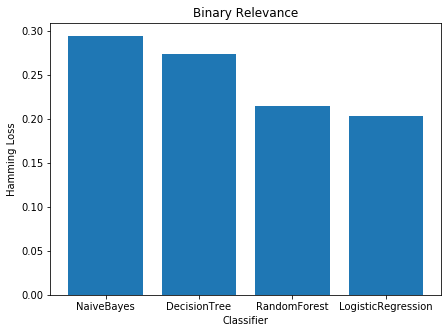

In [65]:
yLabels = ["NaiveBayes","DecisionTree","RandomForest","LogisticRegression"]
plt.subplots(1,1,figsize=(7,5))
fig1 = plt.bar(yLabels,binaryRelevanceList)
plt.ylabel('Hamming Loss')
plt.xlabel('Classifier')
plt.title("Binary Relevance")

Text(0.5, 1.0, 'Binary Relevance with under sampling')

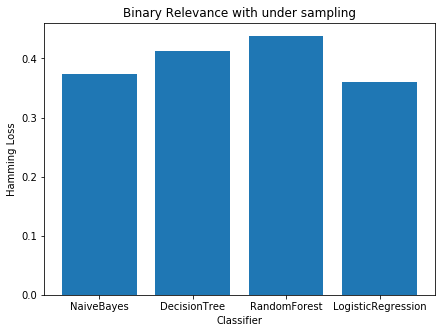

In [66]:
plt.subplots(1,1,figsize=(7,5))
fig2 = plt.bar(yLabels,binaryRelevanceWithUndersamplingList)
plt.ylabel('Hamming Loss')
plt.xlabel('Classifier')
plt.title("Binary Relevance with under sampling")

Text(0.5, 1.0, 'Chain Classification')

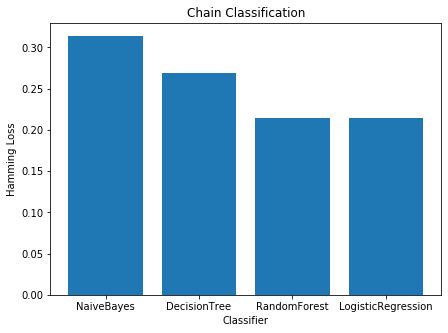

In [67]:
plt.subplots(1,1,figsize=(7,5))
fig3 = plt.bar(yLabels,chainClassificationList)
plt.ylabel('Hamming Loss')
plt.xlabel('Classifier')
plt.title("Chain Classification")

## Task 6: Reflect on the Performance of the Different Models Evaluated

A macro-average computes each of the metric independently for each class and then take the average, hence treating all classes equally.
**********************************************************************************************************
The Hamming Loss (HL) is the fraction of the wrong labels to the total number of labels. Hence, for the binary case (imbalanced or not), HL = 1 - Accuracy. It gives each label equal weighting.
**********************************************************************************************************
Thus we have chosen Hamming Loss as evaluating factor for classifiers.<br>
Below is the table detailing values of Hamming Loss and Macro Avg f1-Score for different algorithm and classifier combinations:

|Algorithm|Classifer|Hamming Loss|Macro Avg f1-Score|
| --- | --- | --- | --- |
|BinaryRelavanceAlgorithm|Naïve Bayes|0.294|0.46|
|BinaryRelavanceAlgorithm|Decision Tree|0.274|0.41|
|BinaryRelavanceAlgorithm|RandomForest|0.214|0.25|
|BinaryRelavanceAlgorithm|Logistic Regression|<b>0.203</b>|0.35|
| --- | --- | --- | --- |
|BinaryRelavanceAlgorithm with Under Sampling|Naïve Bayes|0.374|0.45|
|BinaryRelavanceAlgorithm with Under Sampling|Decision Tree|0.413|0.41|
|BinaryRelavanceAlgorithm with Under Sampling|RandomForest|0.438|0.47|
|BinaryRelavanceAlgorithm with Under Sampling|Logistic Regression|<b>0.360</b>|0.46|
| --- | --- | --- | --- |
|ClassifierChainsAlgorithm|Naïve Bayes|0.314|0.45|
|ClassifierChainsAlgorithm|Decision Tree|0.269|0.41|
|ClassifierChainsAlgorithm|RandomForest|0.214|0.25|
|ClassifierChainsAlgorithm|Logistic Regression|<b>0.214</b>|0.40|

From the table it is evident that <b>Logistic Regression</b> works the best in all the three cases. That is exactly the same result we observed when we evaluated using Grid Search CV.

We expected better results (i.e. lower values of hamming loss) both in the cases of undersampling and using the chain classifier, but that was not the case. For binary relevance with undersampling, we suspect the reason to be that when undersampling was not done, there might be more records of a class label in the training set and the same class label records were also greater in number in the test set as well. <br/>
While, in the case of chain classification, the class labels might not have any dependencies between them, so combining the labels along with the features might have reduced the prediction accuracy.

## Exporting the note-book to html format

In [1]:
! jupyter nbconvert --to html Assignment_1_Shaurya(19200891)_Susmitha(19200996).ipynb

[NbConvertApp] Converting notebook Assignment_1_Shaurya(19200891)_Susmitha(19200996).ipynb to html
[NbConvertApp] Writing 500006 bytes to Assignment_1_Shaurya(19200891)_Susmitha(19200996).html
